# 2. Preliminaries

## 2.1 Data Manipulation

In [1]:
import torch

In [2]:
x = torch.arange(12, dtype=torch.int64)

In [ ]:
torch.exp2(x)

tensor([1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01, 3.2000e+01,
        6.4000e+01, 1.2800e+02, 2.5600e+02, 5.1200e+02, 1.0240e+03, 2.0480e+03])

In [4]:
torch.exp(torch.randn(2, 2, 2, dtype=torch.float32))

tensor([[[1.8034, 6.6650],
         [0.7807, 0.4917]],

        [[1.1948, 0.4623],
         [2.2276, 1.6825]]])

In [5]:
x = torch.arange(12, dtype=torch.float32).reshape((3, 4))
torch.cat((x, x), dim=0), torch.cat((x, x), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([[ 0.,  1.,  2.,  3.,  0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.,  4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.,  8.,  9., 10., 11.]]))

In [6]:
x = torch.bernoulli(torch.Tensor(5, 5).fill_(0.5))
y = torch.bernoulli(torch.Tensor(5, 5).fill_(0.5))
x == y

tensor([[ True,  True, False, False, False],
        [ True, False, False,  True, False],
        [ True, False,  True, False,  True],
        [ True, False, False, False,  True],
        [ True, False, False, False,  True]])

In [7]:
x.sum()

tensor(12.)

## 2.2 Data Preprocessing

In [8]:
import os

os.makedirs(os.path.join(".", "data"), exist_ok=True)
data_file = os.path.join(".", "data", "house_tiny.csv")
with open(data_file, "w") as f:
    f.write(
        """NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000"""
    )

In [9]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


## 2.3 Linear Algebra

In [ ]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

In [11]:
A = torch.arange(6).reshape(3, 2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [12]:
A.T

tensor([[0, 2, 4],
        [1, 3, 5]])

In [13]:
A = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
A

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [14]:
A == A.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [15]:
A = torch.arange(24).reshape(2, 3, 4)
A, A.shape

(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]),
 torch.Size([2, 3, 4]))

In [16]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone()  # Assign a copy of A to B by allocating new memory
A, A + B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

In [17]:
# Hadamard product (elementwise product)
A * B

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [18]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

In [19]:
x = torch.arange(3, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2.]), tensor(3.))

In [20]:
A.shape, A.sum()

(torch.Size([2, 3]), tensor(15.))

In [21]:
A, A.sum(axis=0)

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([3., 5., 7.]))

In [22]:
A.shape, A.sum(axis=0).shape

(torch.Size([2, 3]), torch.Size([3]))

In [23]:
A, A.sum(axis=1)

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([ 3., 12.]))

In [24]:
A.shape, A.sum(axis=1).shape

(torch.Size([2, 3]), torch.Size([2]))

In [25]:
A.sum(axis=[0, 1]) == A.sum()  # Same as A.sum()

tensor(True)

In [26]:
A.mean(), A.sum() / A.numel()

(tensor(2.5000), tensor(2.5000))

In [27]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([1.5000, 2.5000, 3.5000]), tensor([1.5000, 2.5000, 3.5000]))

In [28]:
A.sum(axis=1)

tensor([ 3., 12.])

In [29]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A, sum_A.shape

(tensor([[ 3.],
         [12.]]),
 torch.Size([2, 1]))

In [30]:
A / sum_A

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

In [31]:
torch.arange(24).reshape(3, 2, 4).sum(axis=2)

tensor([[ 6, 22],
        [38, 54],
        [70, 86]])

In [32]:
torch.arange(24).reshape(3, 2, 4).sum(axis=2, keepdim=True)

tensor([[[ 6],
         [22]],

        [[38],
         [54]],

        [[70],
         [86]]])

In [ ]:
A, A.cumsum(axis=0), A.cumsum(axis=1)

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[0., 1., 2.],
         [3., 5., 7.]]),
 tensor([[ 0.,  1.,  3.],
         [ 3.,  7., 12.]]))

In [34]:
y = torch.ones(3, dtype=torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

In [35]:
A.shape, x.shape, torch.mv(A, x), A @ x

(torch.Size([2, 3]), torch.Size([3]), tensor([ 5., 14.]), tensor([ 5., 14.]))

In [ ]:
B = torch.ones(3, 4)
torch.mm(A, B), A @ B

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

In [ ]:
# L2 norm
u = torch.tensor([3.0, -4.0, 5, -3])
torch.norm(u)

tensor(7.6811)

In [38]:
# L1 norm: the Manhattan distance
torch.abs(u).sum()

tensor(15.)

In [39]:
# Frobenius norm, which behaves like an L2 norm
torch.norm(torch.ones((4, 9)))

tensor(6.)

## 2.4 Calculus

In [40]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

In [41]:
x = np.arange(0, 3, 0.1)


def f(x):
    return 3 * x**2 - 4 * x

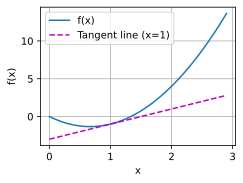

In [42]:
d2l.plot(x, [f(x), 2 * x - 3], "x", "f(x)", legend=["f(x)", "Tangent line (x=1)"])

## 2.5 Automatic Differentiation

In [43]:
x = torch.arange(4.0)
x.requires_grad_(True)
x, x.grad

(tensor([0., 1., 2., 3.], requires_grad=True), None)

In [44]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [ ]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [46]:
x.grad.zero_()  # Reset the gradient
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

**Note**: Invoking `backward` on a non-scalar elicits an error unless we tell PyTorch how to reduce the object to a scalar. For a more detailed description, see [Yang Zhang’s Medium post](https://zhang-yang.medium.com/the-gradient-argument-in-pytorchs-backward-function-explained-by-examples-68f266950c29).



In [47]:
x.grad.zero_()
y = x * x
y.backward()

RuntimeError: grad can be implicitly created only for scalar outputs

In [48]:
y.backward(gradient=torch.ones_like(y))
x.grad

tensor([0., 2., 4., 6.])

Suppose we have z = x * y and y = x * x but we want to focus on the direct influence of x on z rather than the influence conveyed via y. In this case, we can create a new variable u that takes the same value as y but whose provenance (how it was created) has been wiped out. Thus u has no ancestors in the graph and gradients do not flow through u to x. For example, taking the gradient of z = x * u will yield the result u, (not 3 * x * x as you might have expected since z = x * x * x).

In [49]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [50]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

In [51]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [52]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [53]:
a.grad == d / a

tensor(True)

## 2.6. Probability and Statistics

In [54]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

In [55]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [46, 54]


In [56]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()

tensor([48., 52.])

In [57]:
Multinomial(100, fair_probs).sample() / 100

tensor([0.4500, 0.5500])

In [58]:
counts = Multinomial(10000, fair_probs).sample()
counts / 10000

tensor([0.5042, 0.4958])

In [59]:
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / torch.arange(1, 10001).reshape(10000, 1)
estimates = estimates.numpy()

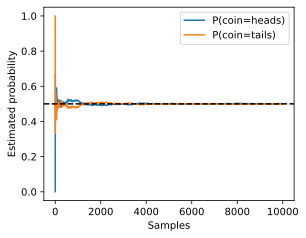

In [60]:
d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color="black", linestyle="dashed")
d2l.plt.gca().set_xlabel("Samples")
d2l.plt.gca().set_ylabel("Estimated probability")
d2l.plt.legend()

# 3. Linear Neural Networks for Regression

## 3.1 Linear Regression

In [61]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

## 3.2. Object-Oriented Design for Implementation¶

We wish to have three classes: 

1. Module contains models, losses, and optimization methods; 
2. DataModule provides data loaders for training and validation;
3. both classes are combined using the Trainer class, which allows us to train models on a variety of hardware platforms

In [62]:
import time
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

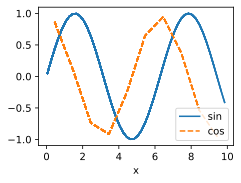

In [63]:
board = d2l.ProgressBoard("x")
for x in np.arange(0, 10, 0.1):
    board.draw(x, np.sin(x), "sin", every_n=2)
    board.draw(x, np.cos(x), "cos", every_n=10)

## 3.3 Synthetic Regression Data

In [64]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [65]:
class SyntheticRegressionData(d2l.DataModule):  # @save
    """Synthetic data for linear regression."""

    def __init__(self, w, b, noise=0.01, num_train=1000, num_val=1000, batch_size=32):
        super().__init__()
        self.save_hyperparameters()
        n = num_train + num_val
        self.X = torch.randn(n, len(w))
        noise = torch.randn(n, 1) * noise
        self.y = torch.matmul(self.X, w.reshape((-1, 1))) + b + noise

    def get_dataloader(self, train):
        if train:
            indices = list(range(0, self.num_train))
            # The examples are read in random order
            random.shuffle(indices)
        else:
            indices = list(range(self.num_train, self.num_train + self.num_val))
        for i in range(0, len(indices), self.batch_size):
            batch_indices = torch.tensor(indices[i : i + self.batch_size])
            yield self.X[batch_indices], self.y[batch_indices]

In [66]:
data = SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)

In [67]:
X, y = next(iter(data.train_dataloader()))
print("X shape:", X.shape, "\ny shape:", y.shape)

X shape: torch.Size([32, 2]) 
y shape: torch.Size([32, 1])


In [68]:
@d2l.add_to_class(d2l.DataModule)  # @save
def get_tensorloader(self, tensors, train, indices=slice(0, None)):
    tensors = tuple(a[indices] for a in tensors)
    dataset = torch.utils.data.TensorDataset(*tensors)
    return torch.utils.data.DataLoader(dataset, self.batch_size, shuffle=train)


@d2l.add_to_class(SyntheticRegressionData)  # @save
def get_dataloader(self, train):
    i = slice(0, self.num_train) if train else slice(self.num_train, None)
    return self.get_tensorloader((self.X, self.y), train, i)

## 3.4. Linear Regression Implementation from Scratch

In [73]:
%matplotlib inline
import torch
from d2l import torch as d2l

In [74]:
class LinearRegressionScratch(d2l.Module):  # @save
    """The linear regression model implemented from scratch."""

    def __init__(self, num_inputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.w = torch.normal(0, sigma, (num_inputs, 1), requires_grad=True)
        self.b = torch.zeros(1, requires_grad=True)

In [75]:
@d2l.add_to_class(LinearRegressionScratch)  # @save
def forward(self, X):
    return torch.matmul(X, self.w) + self.b

In [76]:
@d2l.add_to_class(LinearRegressionScratch)  # @save
def loss(self, y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

In [77]:
class SGD(d2l.HyperParameters):  # @save
    """Minibatch stochastic gradient descent."""

    def __init__(self, params, lr):
        self.save_hyperparameters()

    def step(self):
        for param in self.params:
            param -= self.lr * param.grad

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

In [78]:
@d2l.add_to_class(LinearRegressionScratch)  # @save
def configure_optimizers(self):
    return SGD([self.w, self.b], self.lr)

In [79]:
@d2l.add_to_class(d2l.Trainer)  # @save
def prepare_batch(self, batch):
    return batch


@d2l.add_to_class(d2l.Trainer)  # @save
def fit_epoch(self):
    self.model.train()
    for batch in self.train_dataloader:
        loss = self.model.training_step(self.prepare_batch(batch))
        self.optim.zero_grad()
        with torch.no_grad():
            loss.backward()
            if self.gradient_clip_val > 0:  # To be discussed later
                self.clip_gradients(self.gradient_clip_val, self.model)
            self.optim.step()
        self.train_batch_idx += 1
    if self.val_dataloader is None:
        return
    self.model.eval()
    for batch in self.val_dataloader:
        with torch.no_grad():
            self.model.validation_step(self.prepare_batch(batch))
        self.val_batch_idx += 1

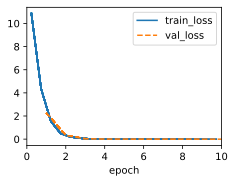

In [80]:
model = LinearRegressionScratch(2, lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [81]:
with torch.no_grad():
    print(f"error in estimating w: {data.w - model.w.reshape(data.w.shape)}")
    print(f"error in estimating b: {data.b - model.b}")

error in estimating w: tensor([ 0.0002, -0.0004])
error in estimating b: tensor([0.0005])


## 3.5. Concise Implementation of Linear Regression

In [82]:
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

In [83]:
class LinearRegression(d2l.Module):  # @save
    """The linear regression model implemented with high-level APIs."""

    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.LazyLinear(1)
        self.net.weight.data.normal_(0, 0.01)
        self.net.bias.data.fill_(0)

    def forward(self, X):
        return self.net(X)

    def loss(self, y_hat, y):
        fn = nn.MSELoss()
        return fn(y_hat, y)

    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), self.lr)

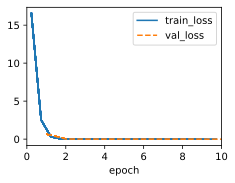

In [84]:
model = LinearRegression(lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [95]:
for name, param in model.named_parameters():
    print(f"Parameter name: {name}, Shape: {param.shape}")

Parameter name: net.weight, Shape: torch.Size([1, 2])
Parameter name: net.bias, Shape: torch.Size([1])


In [96]:
@d2l.add_to_class(LinearRegression)
def get_w_b(self):
    return self.net.weight.data, self.net.bias.data

In [98]:
w, b = model.get_w_b()
print(f"error in estimating w: {data.w - w.reshape(data.w.shape)}")
print(f"error in estimating b: {data.b - b}")

error in estimating w: tensor([-0.0006, -0.0002])
error in estimating b: tensor([-0.0006])


## 3.7 Weight Decay

In [99]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [102]:
class Data(d2l.DataModule):
    def __init__(self, num_train, num_val, num_inputs, batch_size):
        self.save_hyperparameters()
        n = num_train + num_val
        self.X = torch.randn(n, num_inputs)
        noise = torch.randn(n, 1) * 0.01
        w, b = torch.ones((num_inputs, 1)) * 0.01, 0.05
        self.y = torch.matmul(self.X, w) + b + noise

    def get_dataloader(self, train):
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader([self.X, self.y], train, i)

In [103]:
def l2_penalty(w):
    return (w**2).sum() / 2

In [104]:
class WeightDecayScratch(d2l.LinearRegressionScratch):
    def __init__(self, num_inputs, lambd, lr, sigma=0.01):
        super().__init__(num_inputs, lr, sigma)
        self.save_hyperparameters()

    def loss(self, y_hat, y):
        return super().loss(y_hat, y) + self.lambd * l2_penalty(self.w)

In [105]:
data = Data(num_train=20, num_val=100, num_inputs=200, batch_size=5)
trainer = d2l.Trainer(max_epochs=20)


def train_scratch(lambd):
    model = WeightDecayScratch(num_inputs=200, lambd=lambd, lr=0.01)
    model.board.yscale = "log"
    trainer.fit(model, data)
    print("L2 norm of w:", float(l2_penalty(model.w)))

L2 norm of w: 0.01026731077581644


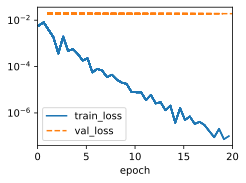

In [106]:
train_scratch(0)

L2 norm of w: 0.0006037598941475153


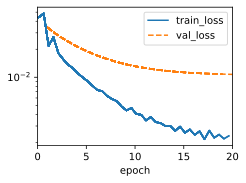

In [107]:
train_scratch(3)

In [108]:
class WeightDecay(d2l.LinearRegression):
    def __init__(self, wd, lr):
        super().__init__(lr)
        self.save_hyperparameters()
        self.wd = wd

    def configure_optimizers(self):
        return torch.optim.SGD(
            [
                {"params": self.net.weight, "weight_decay": self.wd},
                {"params": self.net.bias},
            ],
            lr=self.lr,
        )

L2 norm of w: 0.0021461916621774435


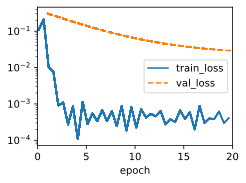

In [109]:
model = WeightDecay(wd=3, lr=0.01)
model.board.yscale = "log"
trainer.fit(model, data)

print("L2 norm of w:", float(l2_penalty(model.get_w_b()[0])))